<a href="https://colab.research.google.com/github/strzelnat/Statistics_basics/blob/main/lessons/basics/lesson6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./sample_data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
len(df)

545

In [14]:
cov = df['bathrooms'].cov(df['price'])
corr = df['bathrooms'].corr(df['price'])

print(f'Covariantion between number of bathrooms and prices = {cov}')
print(f'Correlation between number of bathrooms and prices = {corr}')

Covariantion between number of bathrooms and prices = 486409.33337830607
Correlation between number of bathrooms and prices = 0.517545339455011


In [13]:
cov_tab = df.cov(numeric_only=True)
corr_tab = df.corr(numeric_only=True)

In [15]:
cov_tab

,price,area,bedrooms,bathrooms,stories,parking
price,3.498544e+12,2.175676e+09,505946.425931,486409.333378,682644.632825,619467.324204
area,2.175676e+09,4.709512e+06,243.232140,211.346617,158.129368,659.989696
bedrooms,5.059464e+05,2.432321e+02,0.544738,0.138674,0.261589,0.088562
bathrooms,4.864093e+05,2.113466e+02,0.138674,0.252476,0.142171,0.076842
stories,6.826446e+05,1.581294e+02,0.261589,0.142171,0.752543,0.034043
parking,6.194673e+05,6.599897e+02,0.088562,0.076842,0.034043,0.742330


In [16]:
corr_tab

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

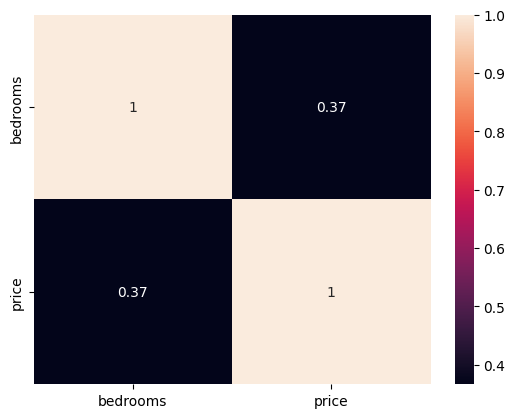

In [26]:
sns.heatmap(df[['bedrooms','price']].corr(), annot=True)

In [41]:
taxi = pd.read_parquet('yellow_tripdata_2021-05.parquet', columns=['trip_distance','fare_amount','total_amount','tip_amount','tpep_pickup_datetime','RatecodeID'])
taxi.query("tpep_pickup_datetime >= '2021-05-09' & tpep_pickup_datetime <'2021-05-10'", inplace = True)
taxi.query("tip_amount > 0 & tip_amount <= 100 & RatecodeID == 4", inplace = True)
taxi.head(5)

,trip_distance,fare_amount,total_amount,tip_amount,tpep_pickup_datetime,RatecodeID
611116,6.07,19.5,26.46,4.41,2021-05-09 00:08:11,4.0
613423,20.66,57.5,77.16,12.86,2021-05-09 01:37:59,4.0
613738,44.00,98.0,116.80,15.00,2021-05-09 01:24:40,4.0
614041,37.70,169.0,171.80,1.50,2021-05-09 01:05:09,4.0
615551,10.83,41.0,52.26,8.71,2021-05-09 05:02:45,4.0


In [45]:
print(f'Covariance: ', taxi['fare_amount'].cov(taxi['tip_amount']))
print('---------------------------------')
print(taxi.cov(numeric_only=True))

Coovariance:  386.66075354609944
---------------------------------
               trip_distance  fare_amount  total_amount  tip_amount  \
trip_distance     192.366561   715.442695    811.115089   70.140695   
fare_amount       715.442695  3385.828014   3848.338103  386.660754   
total_amount      811.115089  3848.338103   4439.094783  507.127998   
tip_amount         70.140695   386.660754    507.127998  128.459962   
RatecodeID          0.000000     0.000000      0.000000    0.000000   

               RatecodeID  
trip_distance         0.0  
fare_amount           0.0  
total_amount          0.0  
tip_amount            0.0  
RatecodeID            0.0  


In [46]:
print(f'Corealtion: ', taxi['fare_amount'].corr(taxi['tip_amount']))
print('---------------------------------')
print(taxi.corr(numeric_only=True))

Corealtion:  0.5862917080187156
---------------------------------
               trip_distance  fare_amount  total_amount  tip_amount  \
trip_distance       1.000000     0.886498      0.877749    0.446192   
fare_amount         0.886498     1.000000      0.992644    0.586292   
total_amount        0.877749     0.992644      1.000000    0.671563   
tip_amount          0.446192     0.586292      0.671563    1.000000   
RatecodeID               NaN          NaN           NaN         NaN   

               RatecodeID  
trip_distance         NaN  
fare_amount           NaN  
total_amount          NaN  
tip_amount            NaN  
RatecodeID            NaN  


<Axes: >

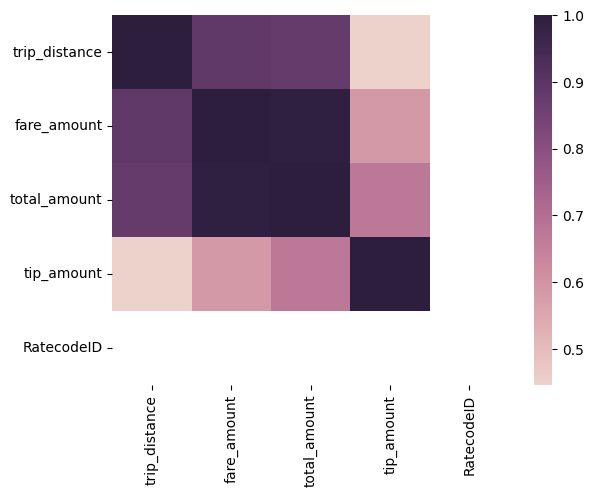

In [52]:
sns.heatmap(taxi.corr(numeric_only=True), cmap=sns.cubehelix_palette(as_cmap=True))

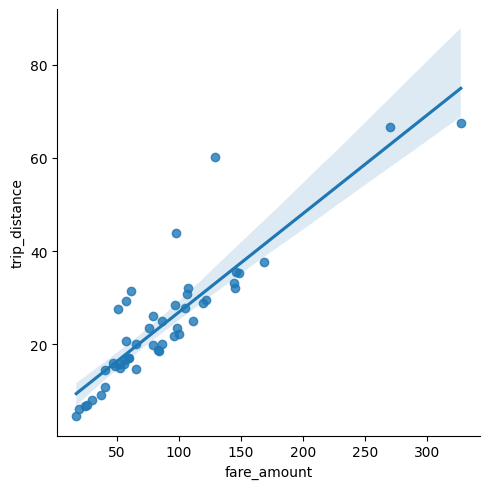

In [54]:
sns.lmplot(data = taxi, x = 'fare_amount', y = 'trip_distance')

In [53]:
!pip install scikit-learn

In [55]:
#get rid of outliers


from sklearn.linear_model import RANSACRegressor, LinearRegression

ransac = RANSACRegressor(estimator = LinearRegression(), max_trials=100, random_state = 42, loss = 'squared_error', residual_threshold=10)

ransac.fit(
    taxi['trip_distance'].to_numpy().reshape(-1,1),
    taxi['fare_amount'].to_numpy().reshape(-1,1)
)

inliers_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inliers_mask)

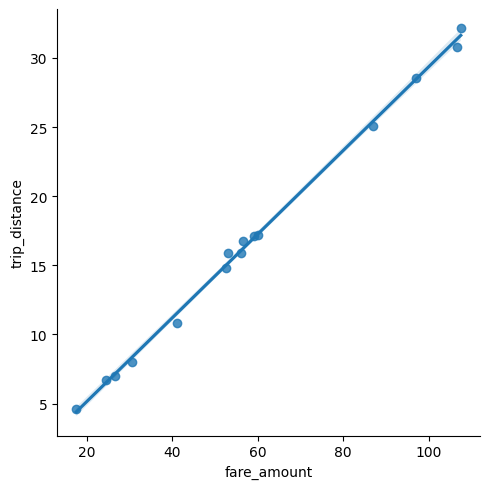

In [58]:
taxi_inliers = taxi[inliers_mask]
sns.lmplot(data = taxi_inliers, x = 'fare_amount', y = 'trip_distance')

<Axes: >

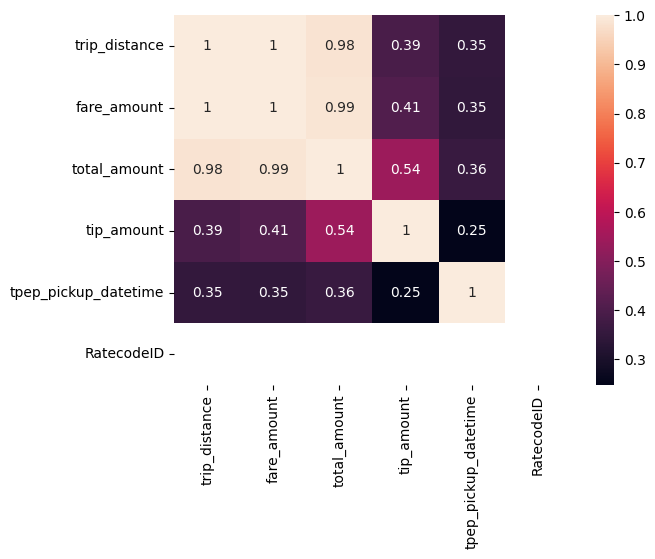

In [67]:
sns.heatmap(taxi_inliers.corr(), annot = True)